In [13]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Keys
from config import (api_key)

In [14]:
#B02001_002E white alone
#B02001_003E Block or African American alone
#B02001_005E Asian Alone
#B02001_004E American Indian and Alaska Native Alone
#B02001_001E Race Total

year = [2013, 2014, 2015, 2016, 2017, 2018]
c = Census(api_key, year=year)

years_list=[]
year_column = []
white_alone=[]
black_aa_alone=[]
asian_alone =[]
ae_an_alone =[]
race_total =[]
states_list = []
state_number = []

combined_data = pd.DataFrame()


#Convert to DataFrame
for x in year:
    c = Census(api_key, year=x)
    
    census_data = c.acs5.get(("NAME", "B02001_001E", "B02001_002E", "B02001_003E", "B02001_005E", "B02001_004E" ), {'for': 'state:06,08, 12, 16, 41, 48'})
   
    census_data_pd = pd.DataFrame(census_data).sort_values("NAME", ascending=True)
    census_data_pd = census_data_pd.reset_index()
    
    for y in range(len(census_data_pd["state"])):
        year_column.append(x)
    

    census_pd = pd.DataFrame(census_data) 
    years_list.extend(year_column)
    state_number.extend(census_pd["state"].tolist())
    states_list.extend(census_pd["NAME"].tolist())
    ae_an_alone.extend(census_pd["B02001_004E"].tolist())
    asian_alone.extend(census_pd["B02001_005E"].tolist())
    black_aa_alone.extend(census_pd["B02001_003E"].tolist())
    white_alone.extend(census_pd["B02001_002E"].tolist())
    race_total.extend(census_pd["B02001_001E"].tolist())
    
    

In [15]:
combined_data["Year"] = year_column
combined_data["State Name"] = states_list
combined_data["White"] = white_alone
combined_data["Black and African American"] = black_aa_alone
combined_data["Asian"] = asian_alone
combined_data["American Indian"] = ae_an_alone
combined_data["Total"] = race_total

In [16]:
combined_data

,Year,State Name,White,Black and African American,Asian,American Indian,Total
0,2013,California,23467167.0,2255372.0,5005635.0,286397.0,37659181.0
1,2013,Colorado,4301096.0,203755.0,141719.0,49177.0,5119329.0
2,2013,Florida,14568521.0,3056152.0,475905.0,58390.0,19091156.0
3,2013,Idaho,1455692.0,8957.0,20141.0,19984.0,1583364.0
4,2013,Oregon,3297149.0,70328.0,147986.0,47411.0,3868721.0
5,2013,Texas,19075100.0,3030970.0,1019260.0,129219.0,25639373.0
6,2014,California,23650913.0,2262323.0,5130536.0,287360.0,38066920.0
7,2014,Colorado,4364911.0,209062.0,146561.0,49917.0,5197580.0
8,2014,Florida,14747196.0,3114841.0,490833.0,59121.0,19361792.0
9,2014,Idaho,1468732.0,9334.0,21749.0,20363.0,1599464.0


In [17]:
cal_all_years  = combined_data.loc[combined_data["State Name"]== "California"]
texas_all_years  = combined_data.loc[combined_data["State Name"]== "Texas"]
colorado_all_years  = combined_data.loc[combined_data["State Name"]== "Colorado"]
florida_all_years  = combined_data.loc[combined_data["State Name"]== "Florida"]
idaho_all_years  = combined_data.loc[combined_data["State Name"]== "Idaho"]
oregon_all_years   = combined_data.loc[combined_data["State Name"]== "Oregon"]



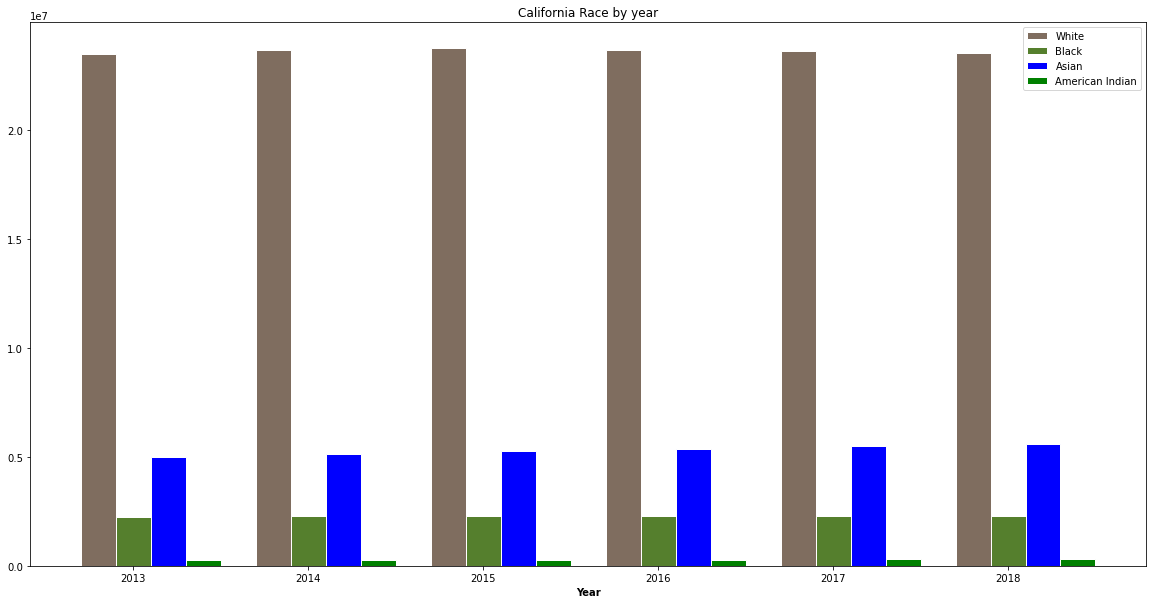

In [29]:
plt.figure(figsize=(20,10))
# set width of bar
barWidth = 0.2
#[cali_data["Population"], texas_data["Population"], col_data["Population"],flo_data["Population"], ida_data["Population"]]
# set height of bar
bars1 = cal_all_years["White"]
bars2 = cal_all_years["Black and African American"]
bars3 = cal_all_years["Asian"]
bars4 = cal_all_years["American Indian"]

# Set position of bar on X axis

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='White')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Black')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='American Indian')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
plt.title("California Race by year")
# Create legend & Show graphic

plt.legend()
plt.savefig('California_Race_BarChart', dpi=300)
plt.show()


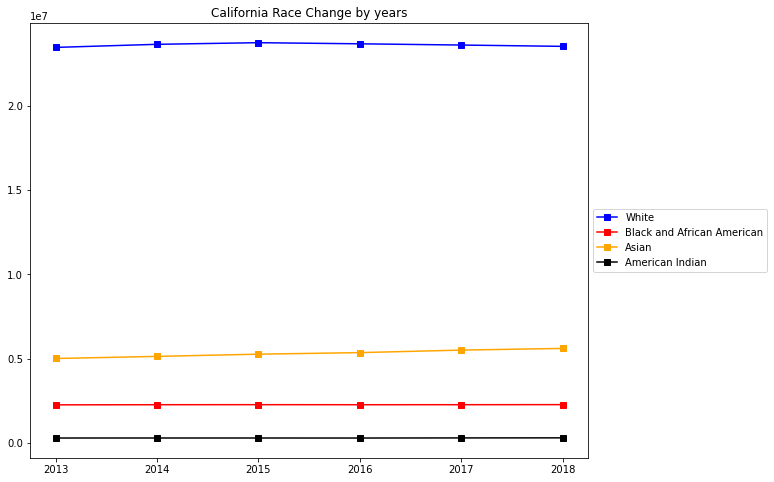

In [26]:

#California Race change
plt.figure(figsize=(10,8))
x_axis = cal_all_years["Year"]
y_axis_white = cal_all_years["White"]
y_axis_black = cal_all_years["Black and African American"]
y_axis_asian = cal_all_years["Asian"]
y_axis_indian = cal_all_years["American Indian"]


White, = plt.plot(x_axis, y_axis_white, marker="s",color="blue", label="White")
Black, = plt.plot(x_axis, y_axis_black, marker="s",color="red", label="Black and African American")
Asian, = plt.plot(x_axis, y_axis_asian, marker="s",color="orange", label="Asian")
Indian, = plt.plot(x_axis, y_axis_indian, marker="s",color="black", label="American Indian")


# Set our legend to where the chart thinks is best
plt.title("California Race Change by years")
plt.legend(handles=[White, Black, Asian, Indian], loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig('Cal_Race_Line', dpi=300)

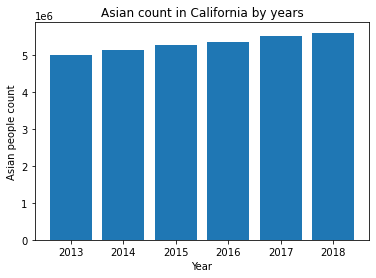

In [28]:
x_values = cali_data["Year"]
y_values = cali_data['Asian']
plt.bar(x_values, y_values)
plt.xlabel("Year")
plt.ylabel("Asian people count")
plt.title("Asian count in California by years")
plt.savefig('Asiancount_cal_bar', dpi=300)
plt.show()
